#Initial Setup

In [ ]:
!pip install py2neo


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.0/177.0 kB 2.2 MB/s eta 0:00:00


In [ ]:
!pip install neo4j

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.5/187.5 kB 7.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for neo4j: filename=neo4j-5.8.0-py3-none-any.whl size=258393 sha256=037b8a240e08f25e5a7ff113796fa2dd74df450a1fbafd6d6b754cac6266fe61
  Stored in directory: /root/.cache/pip/wheels/6b/b5/da/73f634944e04e625954d101cb175ac1aeb9b29751a37d3383e
Successfully built neo4j


In [ ]:
from py2neo import Graph

bolt_url = 'neo4j+s://015a797a.databases.neo4j.io'
password = '8TpNCzRMyKuXyHQbBtcZmUgY70G9HMDXbXApOfQtLeo'

graph = Graph(bolt_url, auth=('neo4j', password))

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

##Data Setup

In [ ]:
df = pd.read_csv("data.csv")

In [ ]:
df.head()

,Unnamed: 0,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,0,2009-10-11,2009-10-11,PRV56011,30,PHY326117,PHY326117,PHY326117,78943,V5866,...,2,2,2,2,2,0,0,30,50,Yes
1,1,2009-01-06,2009-01-06,PRV56011,40,PHY334319,PHY334319,PHY334319,71988,NaN,...,1,1,1,1,2,0,0,1810,760,Yes
2,2,2009-01-22,2009-01-22,PRV56011,200,PHY403831,PHY403831,PHY403831,82382,30000,...,1,1,1,1,2,0,0,1810,760,Yes
3,3,2009-02-03,2009-02-03,PRV56011,20,PHY339887,PHY339887,PHY339887,20381,NaN,...,1,1,1,1,2,0,0,1810,760,Yes
4,4,2009-03-03,2009-03-03,PRV56011,40,PHY345721,PHY345721,PHY345721,V6546,4280,...,1,1,1,1,2,0,0,1810,760,Yes


In [ ]:
df.shape

(145634, 40)

In [ ]:
df['ClaimStartDt'] = pd.to_datetime(df['ClaimStartDt'])
df['ClaimEndDt'] = pd.to_datetime(df['ClaimEndDt'])
df['DOB'] = pd.to_datetime(df['DOB'])
df['DOD'] = pd.to_datetime(df['DOD'])

In [ ]:
df_sliced = df[:75000]

In [ ]:
df_sliced.shape

(75000, 40)

In [ ]:
df.columns

Index(['Unnamed: 0', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'DeductibleAmtPaid', 'ClmAdmitDiagnosisCode', 'AdmissionDt',
       'DischargeDt', 'DiagnosisGroupCode', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'PotentialFraud'],
      dtype='object')

In [ ]:
df.dtypes

Unnamed: 0                                  int64
ClaimStartDt                       datetime64[ns]
ClaimEndDt                         datetime64[ns]
Provider                                   object
InscClaimAmtReimbursed                      int64
AttendingPhysician                         object
OperatingPhysician                         object
OtherPhysician                             object
ClmDiagnosisCode_1                         object
ClmDiagnosisCode_2                         object
DeductibleAmtPaid                         float64
ClmAdmitDiagnosisCode                      object
AdmissionDt                                object
DischargeDt                                object
DiagnosisGroupCode                         object
DOB                                datetime64[ns]
DOD                                datetime64[ns]
Gender                                      int64
Race                                        int64
RenalDiseaseIndicator                      object


##Python EDA

In [ ]:
# Find columns with data types other than int or float
non_numeric_columns = df.select_dtypes(exclude=['int64', 'float64']).columns


In [ ]:
print(non_numeric_columns)

Index(['ClaimStartDt', 'ClaimEndDt', 'Provider', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmAdmitDiagnosisCode', 'AdmissionDt',
       'DischargeDt', 'DiagnosisGroupCode', 'DOB', 'DOD',
       'RenalDiseaseIndicator', 'PotentialFraud'],
      dtype='object')


In [ ]:
# Perform one-hot encoding
encoded_df = pd.get_dummies(df_sliced, columns=non_numeric_columns)

In [ ]:
encoded_df.head()

,Unnamed: 0,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,...,DOD_2009-07-01,DOD_2009-08-01,DOD_2009-09-01,DOD_2009-10-01,DOD_2009-11-01,DOD_2009-12-01,RenalDiseaseIndicator_0,RenalDiseaseIndicator_Y,PotentialFraud_No,PotentialFraud_Yes
0,0,30,0.0,2,1,39,280,12,12,2,...,0,0,0,0,0,0,1,0,0,1
1,1,40,0.0,1,1,39,270,12,12,1,...,0,0,0,0,0,0,1,0,0,1
2,2,200,0.0,1,1,39,270,12,12,1,...,0,0,0,0,0,0,1,0,0,1
3,3,20,0.0,1,1,39,270,12,12,1,...,0,0,0,0,0,0,1,0,0,1
4,4,40,0.0,1,1,39,270,12,12,1,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
encoded_df.shape

(75000, 67809)

In [ ]:
# Get the number of unique rows for each column
unique_counts = df_sliced.nunique()

# Print the results
print("Number of unique rows for each column:")
print(unique_counts)

Number of unique rows for each column:
Unnamed: 0                         75000
ClaimStartDt                         395
ClaimEndDt                           365
Provider                             885
InscClaimAmtReimbursed               254
AttendingPhysician                 16523
OperatingPhysician                 17088
OtherPhysician                     17549
ClmDiagnosisCode_1                  7247
ClmDiagnosisCode_2                  3071
DeductibleAmtPaid                     14
ClmAdmitDiagnosisCode               2267
AdmissionDt                          392
DischargeDt                          365
DiagnosisGroupCode                   725
DOB                                  898
DOD                                   11
Gender                                 2
Race                                   4
RenalDiseaseIndicator                  2
State                                 52
County                               254
NoOfMonths_PartACov                   13
NoOfMonths_PartBCo

In [ ]:
from sklearn.preprocessing import LabelEncoder

###Label Encoding

In [ ]:
# Create a LabelEncoder object
le = LabelEncoder()

# Iterate over the categorical columns
for col in df_sliced.columns:
    if df_sliced[col].dtype == 'object':
        # Fit the LabelEncoder on the data
        le.fit(df_sliced[col])
        # Transform the data
        df_sliced[col] = le.transform(df_sliced[col])

# Print the transformed DataFrame
print(df_sliced.head())

<ipython-input-24-dae561edce8a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sliced[col] = le.transform(df_sliced[col])
<ipython-input-24-dae561edce8a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sliced[col] = le.transform(df_sliced[col])
<ipython-input-24-dae561edce8a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

   Unnamed: 0 ClaimStartDt ClaimEndDt  Provider  InscClaimAmtReimbursed  \
0           0   2009-10-11 2009-10-11       685                      30   
1           1   2009-01-06 2009-01-06       685                      40   
2           2   2009-01-22 2009-01-22       685                     200   
3           3   2009-02-03 2009-02-03       685                      20   
4           4   2009-03-03 2009-03-03       685                      40   

   AttendingPhysician  OperatingPhysician  OtherPhysician  ClmDiagnosisCode_1  \
0                1972                2070            2145                5121   
1                3069                3238            3350                4525   
2               12444               12907           13264                5514   
3                3828                4002            4126                 728   
4                4657                4877            5009                7019   

   ClmDiagnosisCode_2  ...  ChronicCond_Diabetes  ChronicCond_

<ipython-input-24-dae561edce8a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sliced[col] = le.transform(df_sliced[col])
<ipython-input-24-dae561edce8a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sliced[col] = le.transform(df_sliced[col])
<ipython-input-24-dae561edce8a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
print(df_sliced.columns)

Index(['Unnamed: 0', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'DeductibleAmtPaid', 'ClmAdmitDiagnosisCode', 'AdmissionDt',
       'DischargeDt', 'DiagnosisGroupCode', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'PotentialFraud'],
      dtype='object')


##Python Visualizations

<ipython-input-88-6708faa0c92d>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_sliced.corr()


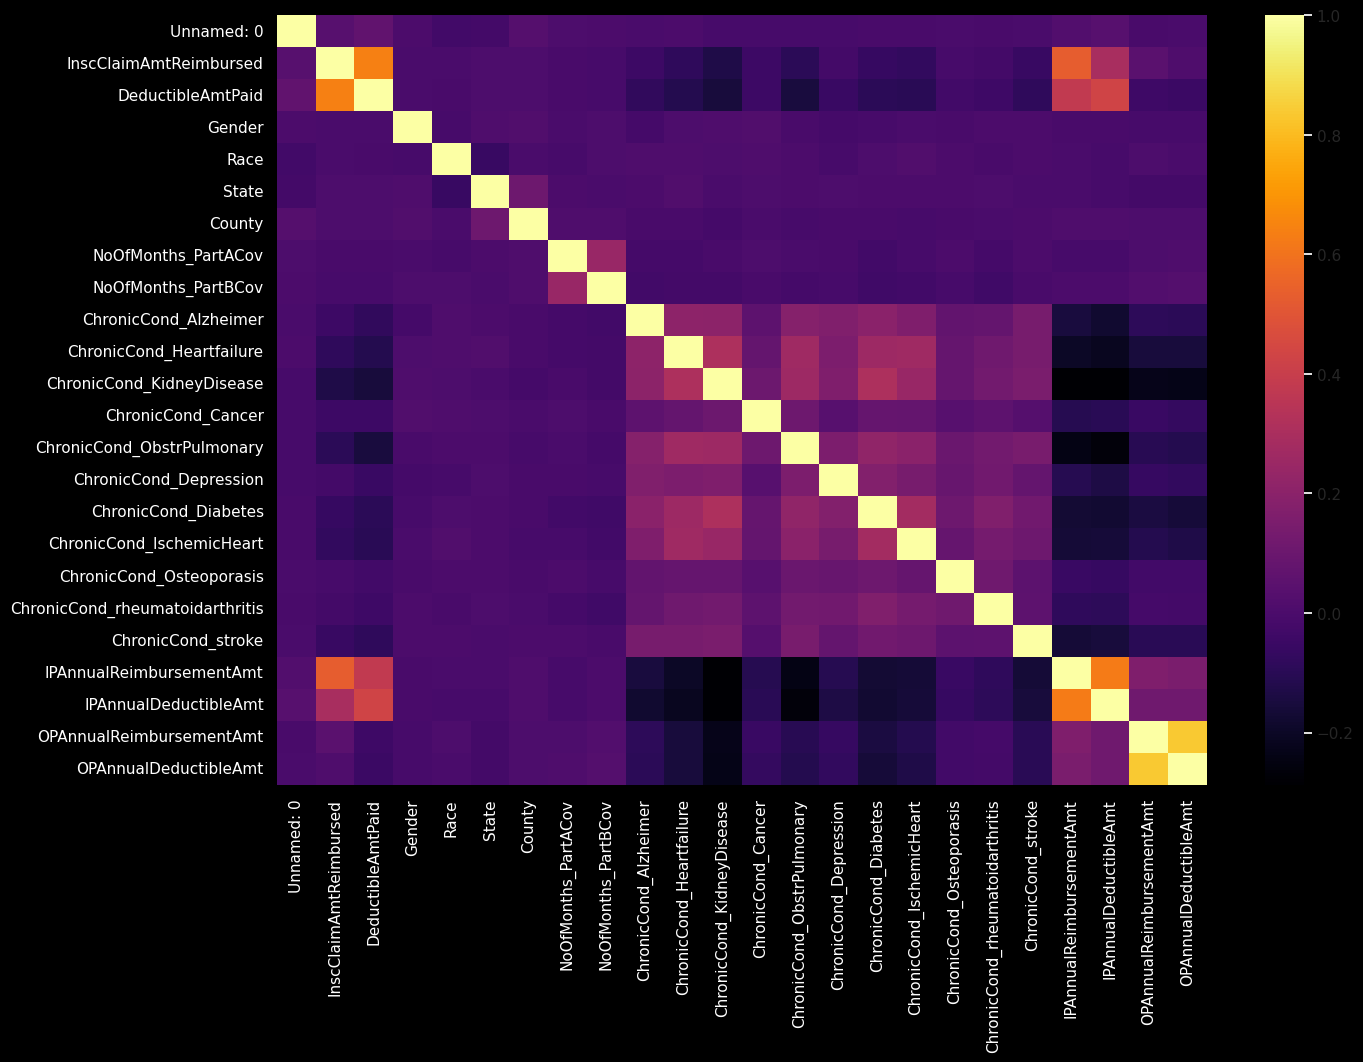

In [ ]:
#@title HeatMap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Create a colormap that starts with black
cmap = LinearSegmentedColormap.from_list('black_to_color', ['black', 'blue', 'cyan', 'green', 'yellow', 'red'], 256)

# Your correlation matrix
corr_matrix = df_sliced.corr()

sns.set_style("dark")

# Set the figure size
plt.figure(figsize=(15, 10), facecolor='black')

# Create the heatmap
ax = sns.heatmap(corr_matrix, annot=False, cmap='inferno')

# Set color of the labels
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

# Set color of the ticks
ax.tick_params(colors='white')

# Set spine colors
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

# Set spine transparency
ax.spines['bottom'].set_alpha(0.5)
ax.spines['top'].set_alpha(0.5) 
ax.spines['right'].set_alpha(0.5)
ax.spines['left'].set_alpha(0.5)

# Get the colorbar object from the Seaborn heatmap object
cbar = ax.collections[0].colorbar

# Here we can set the color of the colorbar tick labels
cbar.ax.yaxis.set_tick_params(color='white')

# Here we can set the color of the colorbar label
cbar.ax.yaxis.label.set_color('white')
cbar.ax.yaxis.label.set_alpha(1)

plt.show()


In [ ]:
query = '''
MATCH (n)
RETURN n
'''

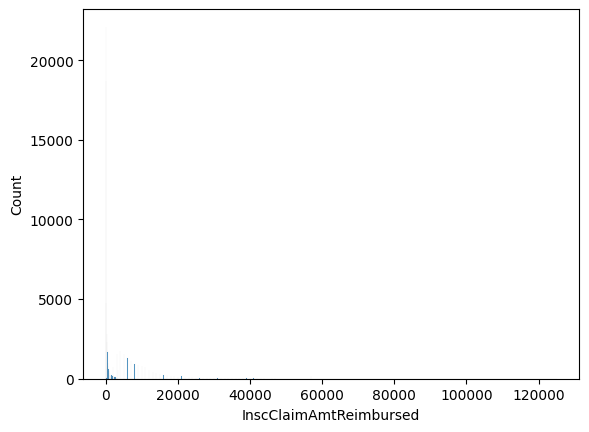

In [ ]:
#@title Count of InscClaimAmtReimbursed
sns.histplot(data=df_sliced, x='InscClaimAmtReimbursed')
plt.show()


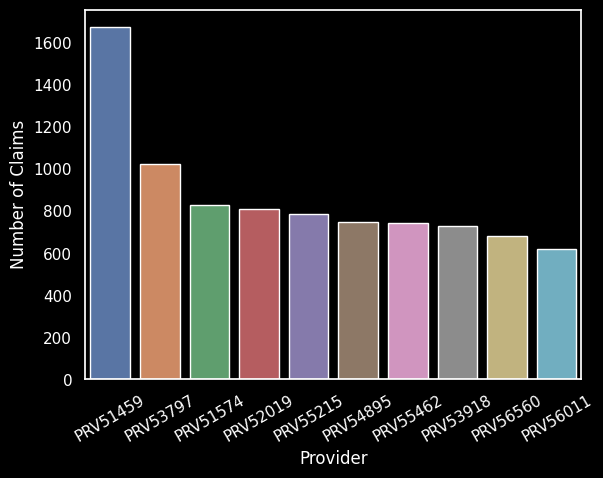

In [ ]:
#@title Number of Claims per Provider
provider_claim_counts = df['Provider'].value_counts().head(10)
# Set the style and background color to black
sns.set_style("dark", {"axes.facecolor": "black", "figure.facecolor": "black"})

# Create the bar plot
sns.barplot(x=provider_claim_counts.index, y=provider_claim_counts.values)

# Set the x and y labels to white
plt.xlabel('Provider', color='white')
plt.ylabel('Number of Claims', color='white')

# Change the color of the x and y axis tick labels to white
ax = plt.gca()
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Rotate the x-axis labels by 30 degrees
plt.xticks(rotation=30)

# Remove gridlines
ax.grid(False)

# Set the plot spines to white
for spine in ax.spines.values():
    spine.set_edgecolor('white')

plt.show()

In [ ]:
query = '''
MATCH (p:Provider)-[:PROVIDES]->(c:Claim)
RETURN p.id AS Provider, count(c) AS Total_Claims
ORDER BY Total_Claims DESC
LIMIT 10

'''

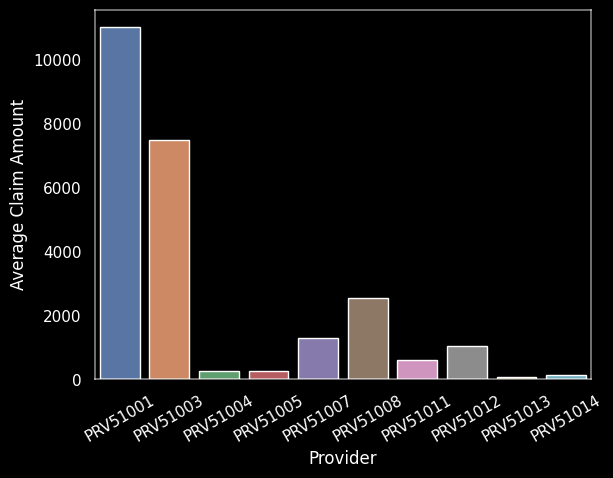

In [ ]:
#@title Average claim amount per Provider
# Set the style and background color to black
sns.set_style("dark", {"axes.facecolor": "black", "figure.facecolor": "black"})

average_claim_amount = df.groupby('Provider')['InscClaimAmtReimbursed'].mean().head(10)

# Create the bar plot
sns.barplot(x=average_claim_amount.index, y=average_claim_amount.values)

# Set the x and y labels to white
plt.xlabel('Provider', color='white')
plt.ylabel('Average Claim Amount', color='white')

# Change the color of the x and y axis tick labels to white
ax = plt.gca()
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Rotate the x-axis labels by 30 degrees
plt.xticks(rotation=30)

# Remove gridlines
ax.grid(False)

# Set the plot spines to white
for spine in ax.spines.values():
    spine.set_edgecolor('white')
    spine.set_alpha(0.5)

plt.show()

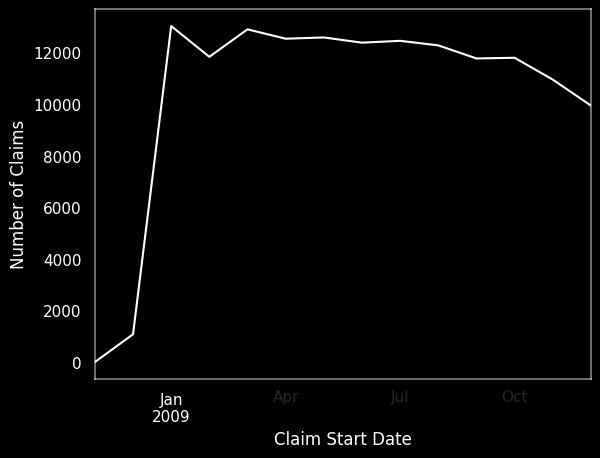

In [ ]:
#@title Timeline of Number of Claims
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and background color to black
sns.set_style("dark", {"axes.facecolor": "black", "figure.facecolor": "black"})

df['ClaimStartDt'] = pd.to_datetime(df['ClaimStartDt'])
claims_over_time = df.groupby(df['ClaimStartDt'].dt.to_period('M')).size()

# Create the line plot
claims_over_time.plot(kind='line', color='white')

# Set the x and y labels to white
plt.xlabel('Claim Start Date', color='white')
plt.ylabel('Number of Claims', color='white')

# Change the color of the x and y axis tick labels to white
ax = plt.gca()
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')


# Remove gridlines
ax.grid(False)

# Set the plot spines to white with 50% transparency
for spine in ax.spines.values():
    spine.set_edgecolor('white')
    spine.set_alpha(0.5)

plt.show()


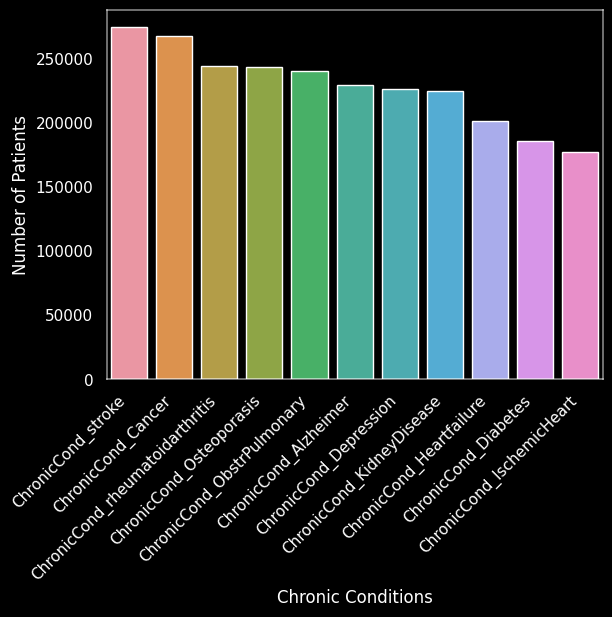

In [ ]:
#@title Number of Patients per disease
chronic_conditions = ['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
                      'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
                      'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
                      'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']

# Set the style and background color to black
sns.set_style("dark", {"axes.facecolor": "black", "figure.facecolor": "black"})

condition_counts = df[chronic_conditions].sum().sort_values(ascending=False)

# Create the bar plot
sns.barplot(x=condition_counts.index, y=condition_counts.values)

# Set the x and y labels to white
plt.xlabel('Chronic Conditions', color='white')
plt.ylabel('Number of Patients', color='white')

# Change the color of the x and y axis tick labels to white
ax = plt.gca()
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Rotate the x-axis labels by 45 degrees and set the horizontal alignment to right
plt.xticks(rotation=45, ha='right')

# Remove gridlines
ax.grid(False)

# Set the plot spines to white with 50% transparency
for spine in ax.spines.values():
    spine.set_edgecolor('white')
    spine.set_alpha(0.5)

plt.show()


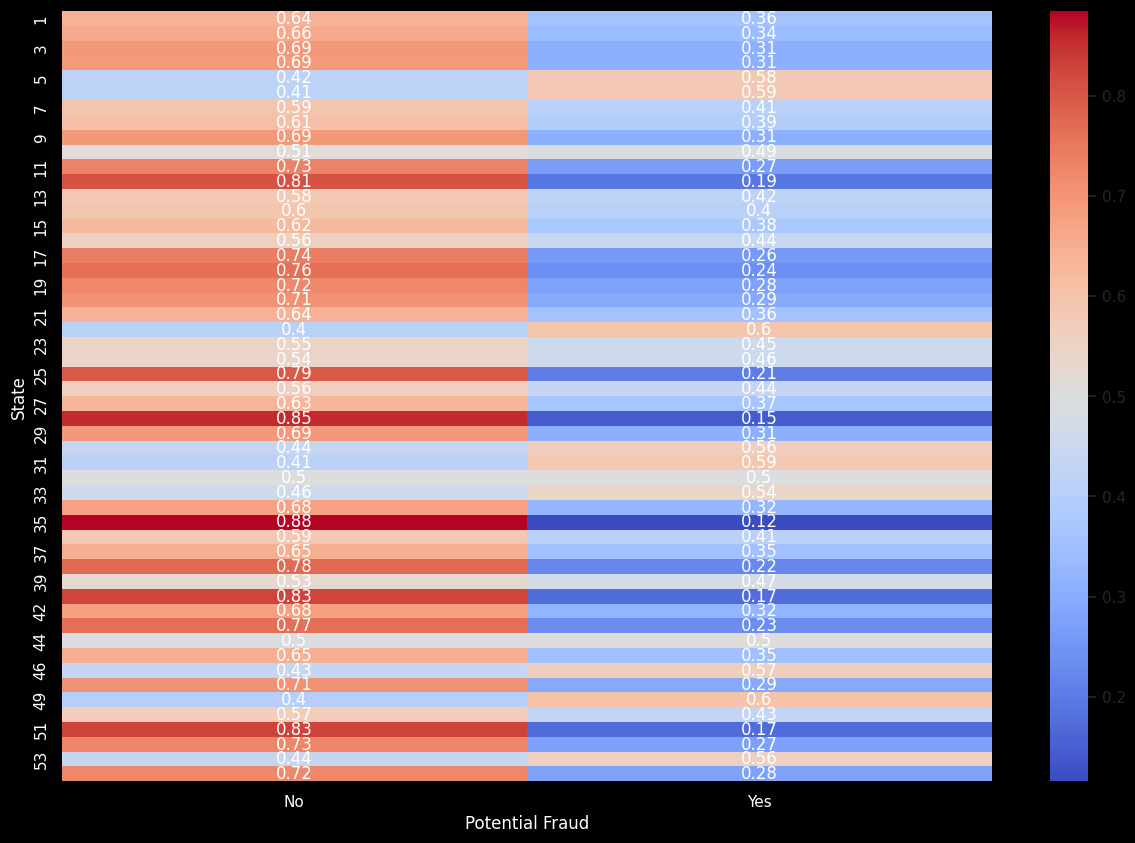

In [ ]:
#@title Fraud by State Heatmap
fraud_by_state = df.groupby(['State', 'PotentialFraud']).size().unstack().fillna(0)
fraud_proportion = fraud_by_state.div(fraud_by_state.sum(axis=1), axis=0)
# Set the style and background color to black
sns.set_style("dark", {"axes.facecolor": "black", "figure.facecolor": "black"})

plt.figure(figsize=(15, 10))

# Create the heatmap
sns.heatmap(fraud_proportion, cmap='coolwarm', annot=True, annot_kws={"color": "white"})

# Set the x and y labels to white
plt.xlabel('Potential Fraud', color='white')
plt.ylabel('State', color='white')

# Change the color of the x and y axis tick labels to white
ax = plt.gca()
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')


# Remove gridlines
ax.grid(False)

# Set the plot spines to white with 50% transparency
for spine in ax.spines.values():
    spine.set_edgecolor('white')
    spine.set_alpha(0.5)

plt.show()

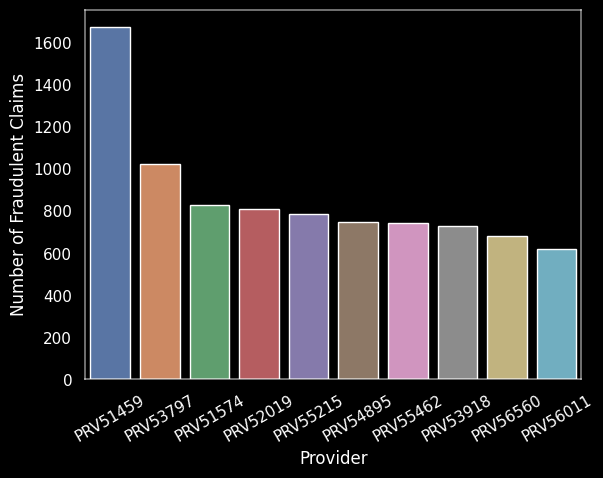

In [ ]:
#@title Fraudulent Claims per Provider
fraud_per_provider = df[df['PotentialFraud'] == 'Yes']['Provider'].value_counts().head(10)
# Set the style and background color to black
sns.set_style("dark", {"axes.facecolor": "black", "figure.facecolor": "black"})

# Create the bar plot
sns.barplot(x=fraud_per_provider.index, y=fraud_per_provider.values)

# Set the x and y labels to white
plt.xlabel('Provider', color='white')
plt.ylabel('Number of Fraudulent Claims', color='white')

# Change the color of the x and y axis tick labels to white
ax = plt.gca()
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Rotate the x-axis labels by 30 degrees
plt.xticks(rotation=30)

# Remove gridlines
ax.grid(False)

# Set the plot spines to white with 50% transparency
for spine in ax.spines.values():
    spine.set_edgecolor('white')
    spine.set_alpha(0.5)

plt.show()

In [ ]:
query = '''
MATCH (p:Provider)-[:PROVIDES]->(c:Claim)
WHERE c.PotentialFraud = 'Yes'
RETURN p.id AS Provider, count(c) AS Fraudulent_Claims
ORDER BY Fraudulent_Claims DESC
LIMIT 10
'''

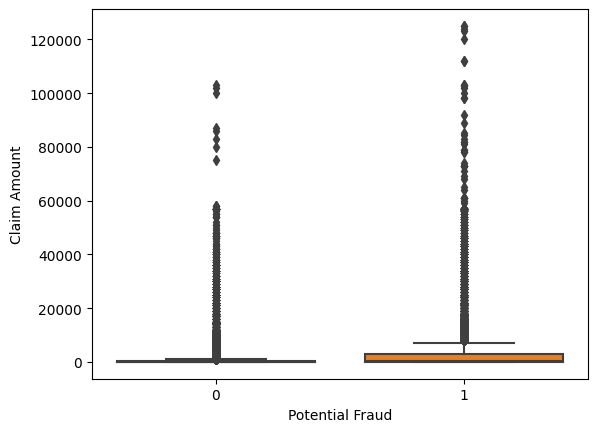

In [ ]:
sns.boxplot(x='PotentialFraud', y='InscClaimAmtReimbursed', data=df_sliced)
plt.xlabel('Potential Fraud')
plt.ylabel('Claim Amount')
plt.show()


In [ ]:
fraud_df = df[df['PotentialFraud'] == 'Yes']
non_fraud_df = df[df['PotentialFraud'] == 'No']

def remove_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]

fraud_filtered = remove_outliers(fraud_df, 'InscClaimAmtReimbursed')
non_fraud_filtered = remove_outliers(non_fraud_df, 'InscClaimAmtReimbursed')


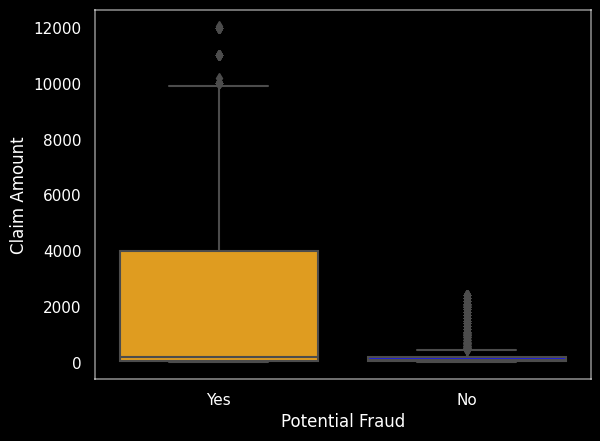

In [ ]:
#@title Fraudulent Claim Amount Boxplot
filtered_df = pd.concat([fraud_filtered, non_fraud_filtered])

# Set the style and background color to black
sns.set_style("dark", {"axes.facecolor": "black", "figure.facecolor": "black"})

# Create the box plot
sns.boxplot(x='PotentialFraud', y='InscClaimAmtReimbursed', data=filtered_df, palette=['orange', 'blue'])

# Set the x and y labels to white
plt.xlabel('Potential Fraud', color='white')
plt.ylabel('Claim Amount', color='white')

# Change the color of the x and y axis tick labels to white
ax = plt.gca()
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Remove gridlines
ax.grid(False)

# Set the plot spines to white with 50% transparency
for spine in ax.spines.values():
    spine.set_edgecolor('white')
    spine.set_alpha(0.5)

plt.show()


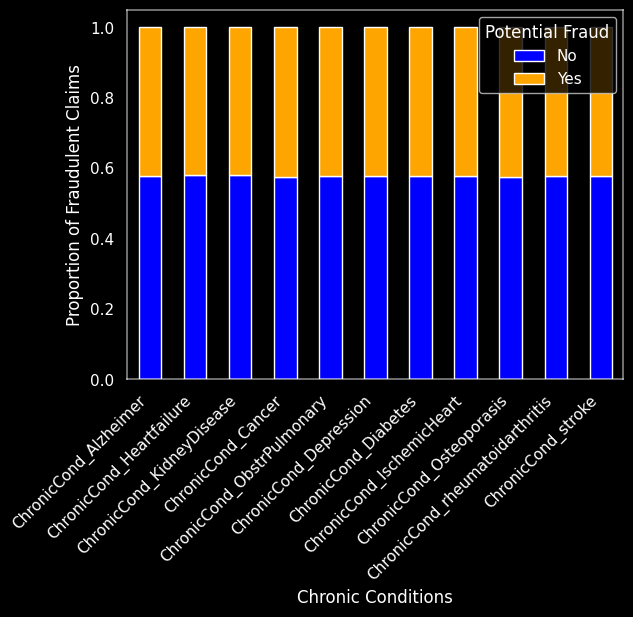

In [ ]:
#@title Number of Fraudulet Claims per Disease
fraud_by_condition = df.groupby(['PotentialFraud'])[chronic_conditions].sum().T
fraud_proportion = fraud_by_condition.div(fraud_by_condition.sum(axis=1), axis=0)
# Set the style and background color to black
sns.set_style("dark", {"axes.facecolor": "black", "figure.facecolor": "black"})

# Create the stacked bar plot
fraud_proportion.plot(kind='bar', stacked=True, color=['blue', 'orange'])

# Set the x and y labels to white
plt.xlabel('Chronic Conditions', color='white')
plt.ylabel('Proportion of Fraudulent Claims', color='white')

# Set the legend title and color to white
legend = plt.legend(title='Potential Fraud')
plt.setp(legend.get_texts(), color='white')
plt.setp(legend.get_title(), color='white')

# Change the color of the x and y axis tick labels to white
ax = plt.gca()
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Rotate the x-axis labels by 45 degrees and set the horizontal alignment to right
plt.xticks(rotation=45, ha='right')

# Remove gridlines
ax.grid(False)

# Set the plot spines to white with 50% transparency
for spine in ax.spines.values():
    spine.set_edgecolor('white')
    spine.set_alpha(0.5)

plt.show()


In [ ]:
query = '''
MATCH (p:Patient)-[:HAS_CLAIM]->(c:Claim)
RETURN p.id AS Patient_ID, 
       c.id AS Fraudulent_Claim_ID,
       p.ChronicCond_Alzheimer AS Has_Alzheimer,
       p.ChronicCond_Heartfailure AS Has_Heartfailure,
       p.ChronicCond_KidneyDisease AS Has_KidneyDisease,
       p.ChronicCond_Cancer AS Has_Cancer,
       p.ChronicCond_ObstrPulmonary AS Has_ObstrPulmonary,
       p.ChronicCond_Depression AS Has_Depression,
       p.ChronicCond_Diabetes AS Has_Diabetes,
       p.ChronicCond_IschemicHeart AS Has_IschemicHeart,
       p.ChronicCond_Osteoporasis AS Has_Osteoporasis,
       p.ChronicCond_rheumatoidarthritis AS Has_rheumatoidarthritis,
       p.ChronicCond_stroke AS Has_stroke,
       c.PotentialFraud AS PotentialFraud
'''


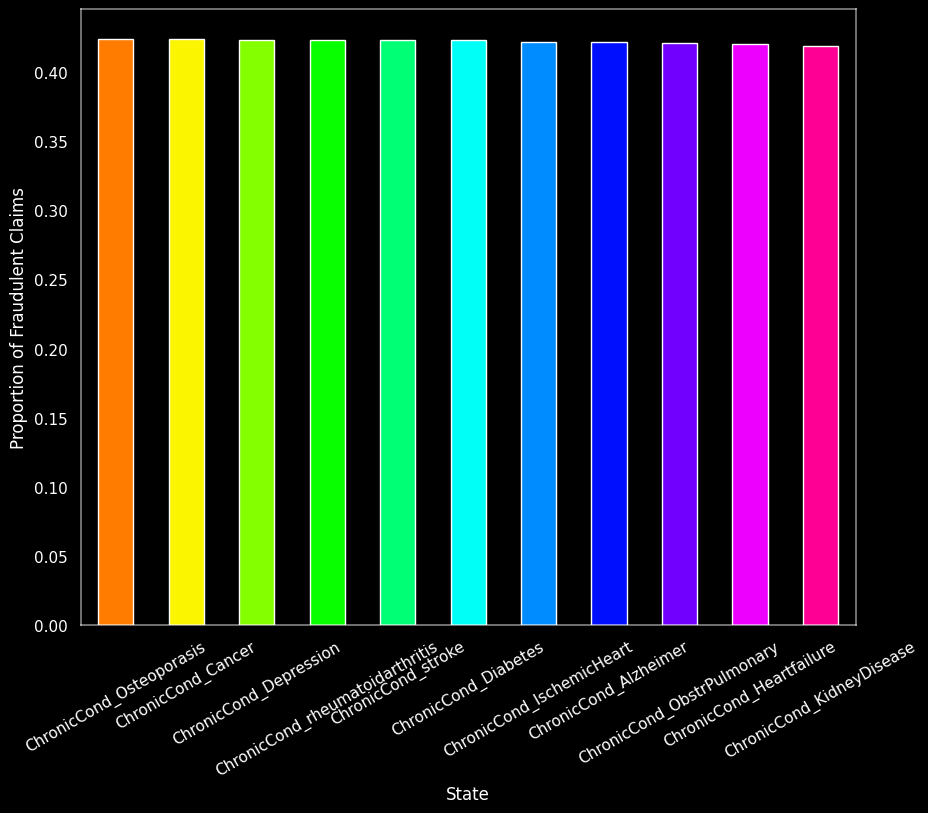

In [ ]:
#@title Proportion of Fraudulent claims per disease
fraud_by_state = df.groupby(['State', 'PotentialFraud']).size().unstack().fillna(0)
plt.figure(figsize=(10, 8))
colors = sns.color_palette('hsv', len(fraud_proportion))

ax = fraud_proportion['Yes'].sort_values(ascending=False).plot(kind='bar', color=colors)

plt.xlabel('State', color='white')
plt.ylabel('Proportion of Fraudulent Claims', color='white')
plt.xticks(rotation=30, color='white')
plt.yticks(color='white')

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

ax.spines['bottom'].set_alpha(0.5)
ax.spines['top'].set_alpha(0.5) 
ax.spines['right'].set_alpha(0.5)
ax.spines['left'].set_alpha(0.5)

plt.gca().patch.set_facecolor('black')

plt.show()


#Neo4J Import

##row by row import

In [ ]:
from py2neo import Node, Relationship

In [ ]:
# Loop through each row in the DataFrame
for index, row in df.iterrows():
    print(index)
    # Create nodes for Provider, Physician, Patient, and Claim
    provider_node = Node("Provider", id=row['Provider'])
    
    attending_physician_node = Node("Physician", id=row['AttendingPhysician'], type="Attending")
    operating_physician_node = Node("Physician", id=row['OperatingPhysician'], type="Operating")
    other_physician_node = Node("Physician", id=row['OtherPhysician'], type="Other")
    
    patient_id = f"patient_{index}"
    patient_node = Node("Patient", id=patient_id, DOB=row['DOB'], Gender=row['Gender'], Race=row['Race'],
                        State=row['State'], County=row['County'],
                        ChronicCond_Alzheimer=row['ChronicCond_Alzheimer'],
                        ChronicCond_Heartfailure=row['ChronicCond_Heartfailure'],
                        ChronicCond_KidneyDisease=row['ChronicCond_KidneyDisease'],
                        ChronicCond_Cancer=row['ChronicCond_Cancer'],
                        ChronicCond_ObstrPulmonary=row['ChronicCond_ObstrPulmonary'],
                        ChronicCond_Depression=row['ChronicCond_Depression'],
                        ChronicCond_Diabetes=row['ChronicCond_Diabetes'],
                        ChronicCond_IschemicHeart=row['ChronicCond_IschemicHeart'],
                        ChronicCond_Osteoporasis=row['ChronicCond_Osteoporasis'],
                        ChronicCond_rheumatoidarthritis=row['ChronicCond_rheumatoidarthritis'],
                        ChronicCond_stroke=row['ChronicCond_stroke'])
    
    claim_id = f"claim_{index}"
    claim_node = Node("Claim",
                  id=claim_id,
                  StartDate=row['ClaimStartDt'],
                  EndDate=row['ClaimEndDt'],
                  Provider=row['Provider'],
                  InscClaimAmtReimbursed=row['InscClaimAmtReimbursed'],
                  AttendingPhysician=row['AttendingPhysician'],
                  OperatingPhysician=row['OperatingPhysician'],
                  OtherPhysician=row['OtherPhysician'],
                  ClmDiagnosisCode_1=row['ClmDiagnosisCode_1'],
                  ClmDiagnosisCode_2=row['ClmDiagnosisCode_2'],
                  DeductibleAmtPaid=row['DeductibleAmtPaid'],
                  ClmAdmitDiagnosisCode=row['ClmAdmitDiagnosisCode'],
                  AdmissionDt=row['AdmissionDt'],
                  DischargeDt=row['DischargeDt'],
                  DiagnosisGroupCode=row['DiagnosisGroupCode'],
                  NoOfMonths_PartACov=row['NoOfMonths_PartACov'],
                  NoOfMonths_PartBCov=row['NoOfMonths_PartBCov'],
                  IPAnnualReimbursementAmt=row['IPAnnualReimbursementAmt'],
                  IPAnnualDeductibleAmt=row['IPAnnualDeductibleAmt'],
                  OPAnnualReimbursementAmt=row['OPAnnualReimbursementAmt'],
                  OPAnnualDeductibleAmt=row['OPAnnualDeductibleAmt'],
                  PotentialFraud=row['PotentialFraud']
                  )
    # Create relationships between nodes
    provider_claim_rel = Relationship(provider_node, "PROVIDES", claim_node)
    attending_claim_rel = Relationship(attending_physician_node, "ATTENDS", claim_node)
    operating_claim_rel = Relationship(operating_physician_node, "OPERATES", claim_node)
    other_claim_rel = Relationship(other_physician_node, "OTHERS", claim_node)
    patient_claim_rel = Relationship(patient_node, "HAS_CLAIM", claim_node)

    # Merge nodes and relationships to the graph database
    graph.merge(provider_node, "Provider", "id")
    graph.merge(attending_physician_node, "Physician", "id")
    graph.merge(operating_physician_node, "Physician", "id")
    graph.merge(other_physician_node, "Physician", "id")
    graph.merge(patient_node, "Patient", "id")
    graph.merge(claim_node, "Claim", "id")

    graph.merge(provider_claim_rel, "Claim", "id")
    graph.merge(attending_claim_rel, "Claim", "id")
    graph.merge(operating_claim_rel, "Claim", "id")
    graph.merge(other_claim_rel, "Claim", "id")
    graph.merge(patient_claim_rel, "Claim", "id")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28


KeyboardInterrupt: ignored

##Batch Processing

In [ ]:
#@title Default title text
def create_batch_query(batch):
    query = '''
    UNWIND $rows AS row
    
    MERGE (provider:Provider {id: row.Provider})
    
    MERGE (attending:Physician {id: row.AttendingPhysician, type: "Attending"})
    MERGE (operating:Physician {id: row.OperatingPhysician, type: "Operating"})
    MERGE (other:Physician {id: row.OtherPhysician, type: "Other"})
    
    MERGE (patient:Patient {id: row.unique_patient_id, DOB: row.DOB, Gender: row.Gender, Race: row.Race,
                            State: row.State, County: row.County,
                            ChronicCond_Alzheimer: row.ChronicCond_Alzheimer,
                            ChronicCond_Heartfailure: row.ChronicCond_Heartfailure,
                            ChronicCond_KidneyDisease: row.ChronicCond_KidneyDisease,
                            ChronicCond_Cancer: row.ChronicCond_Cancer,
                            ChronicCond_ObstrPulmonary: row.ChronicCond_ObstrPulmonary,
                            ChronicCond_Depression: row.ChronicCond_Depression,
                            ChronicCond_Diabetes: row.ChronicCond_Diabetes,
                            ChronicCond_IschemicHeart: row.ChronicCond_IschemicHeart,
                            ChronicCond_Osteoporasis: row.ChronicCond_Osteoporasis,
                            ChronicCond_rheumatoidarthritis: row.ChronicCond_rheumatoidarthritis,
                            ChronicCond_stroke: row.ChronicCond_stroke})
    
    CREATE (claim:Claim {id: row.unique_claim_id, StartDate: row.ClaimStartDt, EndDate: row.ClaimEndDt,
                         InscClaimAmtReimbursed: row.InscClaimAmtReimbursed,
                         DeductibleAmtPaid: row.DeductibleAmtPaid, PotentialFraud: row.PotentialFraud})
    
    CREATE (provider)-[:PROVIDES]->(claim)
    CREATE (attending)-[:ATTENDS]->(claim)
    CREATE (operating)-[:OPERATES]->(claim)
    CREATE (other)-[:OTHERS]->(claim)
    CREATE (patient)-[:HAS_CLAIM]->(claim)
    '''

    graph.run(query, rows=batch)


In [ ]:
# Add unique_patient_id and unique_claim_id to your DataFrame
df['unique_patient_id'] = df.index.map(lambda x: f"patient_{x}")
df['unique_claim_id'] = df.index.map(lambda x: f"claim_{x}")

In [ ]:
# Run the batch processing
batch_size = 1000
num_batches = int(len(df) / batch_size) + 1

for i in range(num_batches):
    print(i)
    batch_start = i * batch_size
    batch_end = (i + 1) * batch_size
    batch = df.iloc[batch_start:batch_end].to_dict('records')
    create_batch_query(batch)

#Querying

In [ ]:
from neo4j import GraphDatabase

In [ ]:
driver = GraphDatabase.driver(bolt_url, auth=('neo4j', password))

In [ ]:
# Query data from Neo4j
def get_claims_amounts(tx):
    result = tx.run("""
        MATCH (p:Provider)-[:PROVIDES]->(c:Claim)
        RETURN p.PotentialFraud AS PotentialFraud, SUM(c.InscClaimAmtReimbursed) AS TotalAmount
        ORDER BY p.PotentialFraud
    """)
    return result.data()

with driver.session() as session:
    claims_data = session.read_transaction(get_claims_amounts)

<ipython-input-51-6dfe14fb3b15>:11: DeprecationWarning: read_transaction has been renamed to execute_read
  claims_data = session.read_transaction(get_claims_amounts)


In [ ]:
# Convert the result to a DataFrame
claims_df = pd.DataFrame(claims_data)

In [ ]:
# Create a bar plot using Seaborn
sns.barplot(x='PotentialFraud', y='TotalAmount', data=claims_df)
plt.xlabel('Potential Fraud')
plt.ylabel('Total Claim Amounts')
plt.show()

ValueError: ignored

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Neo4j query
query = '''
MATCH (p:Provider)-[:PROVIDES]->(c:Claim)<-[:HAS_CLAIM]-(pt:Patient)
RETURN p.id AS Provider, pt.id AS Patient, c.id AS Claim
'''

# Get results and convert to pandas dataframe
results = graph.run(query).data()
df = pd.DataFrame(results)

# Create graph object and add nodes and edges
G = nx.Graph()
G.add_nodes_from(df['Provider'], label='Provider')
G.add_nodes_from(df['Patient'], label='Patient')
G.add_nodes_from(df['Claim'], label='Claim')
G.add_edges_from(df[['Provider', 'Claim']].values, relation='PROVIDES')
G.add_edges_from(df[['Claim', 'Patient']].values, relation='HAS_CLAIM')

# Set node labels
node_labels = {node: data['label'] for node, data in G.nodes(data=True)}

# Draw network graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.3)
nx.draw_networkx_nodes(G, pos, node_color='lightblue', alpha=0.7, node_size=800)
nx.draw_networkx_edges(G, pos, width=2, edge_color='gray', alpha=0.7)
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12, font_color='


SyntaxError: ignored

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


In [ ]:

# Query to create the network graph
query = """
MATCH (p:Provider)-[:PROVIDES]->(c:Claim)<-[:HAS_CLAIM]-(pt:Patient)
RETURN p.id AS Provider, pt.id AS Patient, c.id AS Claim
"""

# Execute the query and create a NetworkX graph
results = graph.run(query)
G = nx.Graph()
for result in results:
    G.add_edge(result['Provider'], result['Claim'])
    G.add_edge(result['Claim'], result['Patient'])

# Define node labels
node_labels = {}
for node in G.nodes():
    if node.startswith('PRV'):
        node_labels[node] = 'Provider'
    elif node.startswith('CLM'):
        node_labels[node] = 'Claim'
    elif node.startswith('PAT'):
        node_labels[node] = 'Patient'

# Draw the network graph
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12, font_color='black')
plt.axis('off')
plt.show()


KeyboardInterrupt: ignored

<ipython-input-11-6f061fe944bb>:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='ClaimAmount', y='PotentialFraud', data=df, palette=["#9b59b6","#3498db"], alpha=0.7)


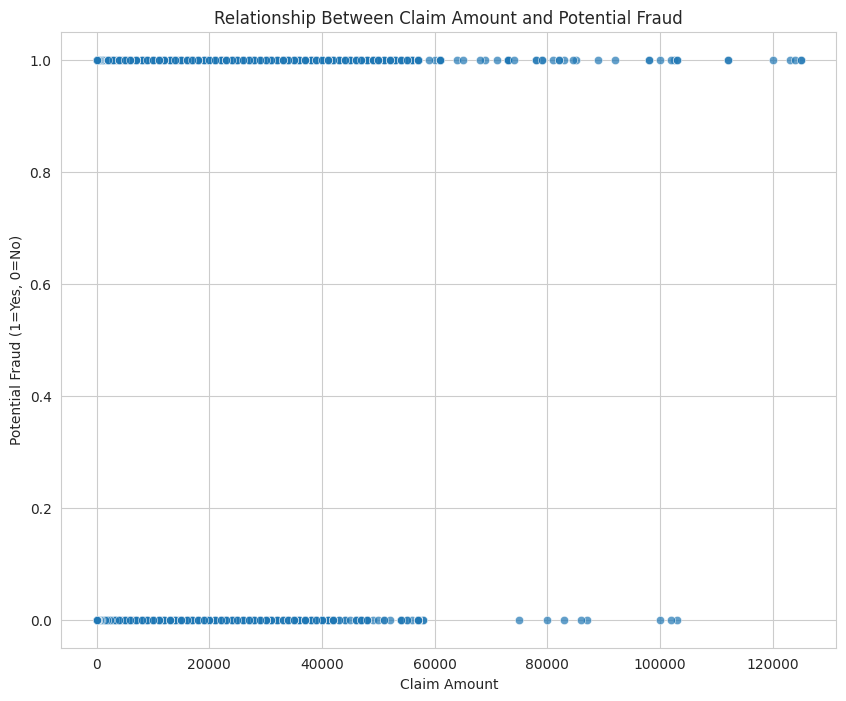

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Neo4j query
query = '''
MATCH (c:Claim)
RETURN c.InscClaimAmtReimbursed AS ClaimAmount, CASE c.PotentialFraud WHEN "Yes" THEN 1 ELSE 0 END AS PotentialFraud
'''

# Get results and convert to pandas dataframe
results = graph.run(query).data()
df = pd.DataFrame(results)

# Plot scatter plot
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))
sns.scatterplot(x='ClaimAmount', y='PotentialFraud', data=df, palette=["#9b59b6","#3498db"], alpha=0.7)
plt.title('Relationship Between Claim Amount and Potential Fraud')
plt.xlabel('Claim Amount')
plt.ylabel('Potential Fraud (1=Yes, 0=No)')
plt.show()


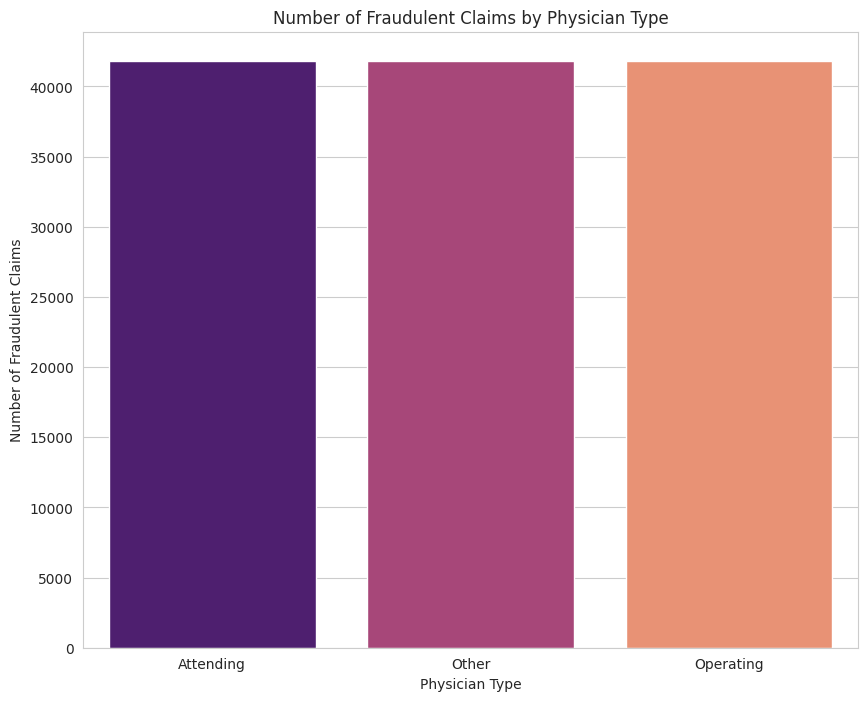

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Neo4j query
query = '''
MATCH (p:Provider)-[:PROVIDES]->(c:Claim {PotentialFraud: "Yes"})
MATCH (a:Physician)-[:ATTENDS|OPERATES|OTHERS]->(c)
RETURN a.type AS PhysicianType, COUNT(DISTINCT c) AS NumFraudulentClaims
ORDER BY NumFraudulentClaims DESC
'''

# Get results and convert to pandas dataframe
results = graph.run(query).data()
df = pd.DataFrame(results)

# Plot stacked bar chart
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))
sns.barplot(x='PhysicianType', y='NumFraudulentClaims', data=df, palette="magma")
plt.title('Number of Fraudulent Claims by Physician Type')
plt.xlabel('Physician Type')
plt.ylabel('Number of Fraudulent Claims')
plt.show()


In [ ]:
# Define function to execute Neo4j queries
def run_query(query):
    with Graph.session() as session:
        result = session.run(query)
        return [record for record in result]




In [ ]:
from neo4j import GraphDatabase

In [ ]:
import numpy as np

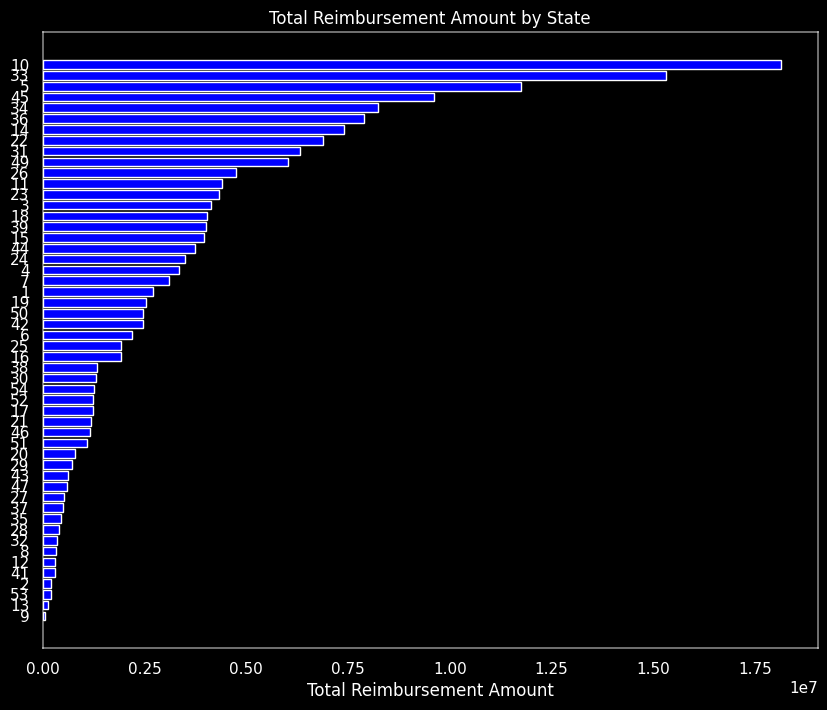

In [ ]:
#@title Total Reimbursement Amount by State
def run_query(query):
    with driver.session() as session:
        result = session.run(query)
        return [record.data() for record in result]

# Query to get total reimbursement amount by state
query = """
MATCH (c:Claim)<-[:HAS_CLAIM]-(p:Patient)
RETURN p.State AS state, SUM(c.InscClaimAmtReimbursed) AS total_reimbursement
ORDER BY total_reimbursement DESC
"""
result = run_query(query)
states = [record['state'] for record in result]
total_reimbursements = [record['total_reimbursement'] for record in result]

# print(result)


# Set the style and background color to black
sns.set_style("dark", {"axes.facecolor": "black", "figure.facecolor": "black"})

# Create horizontal bar chart of total reimbursement amount by state
fig, ax = plt.subplots(figsize=(10, 8))
y_pos = np.arange(len(states))
ax.barh(y_pos, total_reimbursements, align='center', color='blue')
ax.set_yticks(y_pos)
ax.set_yticklabels(states)
ax.invert_yaxis()  # labels read top-to-bottom

# Set the x label and title to white
ax.set_xlabel('Total Reimbursement Amount', color='white')
ax.set_title('Total Reimbursement Amount by State', color='white')

# Change the color of the x and y axis tick labels to white
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Remove gridlines
ax.grid(False)

# Set the plot spines to white with 50% transparency
for spine in ax.spines.values():
    spine.set_edgecolor('white')
    spine.set_alpha(0.5)

plt.show()

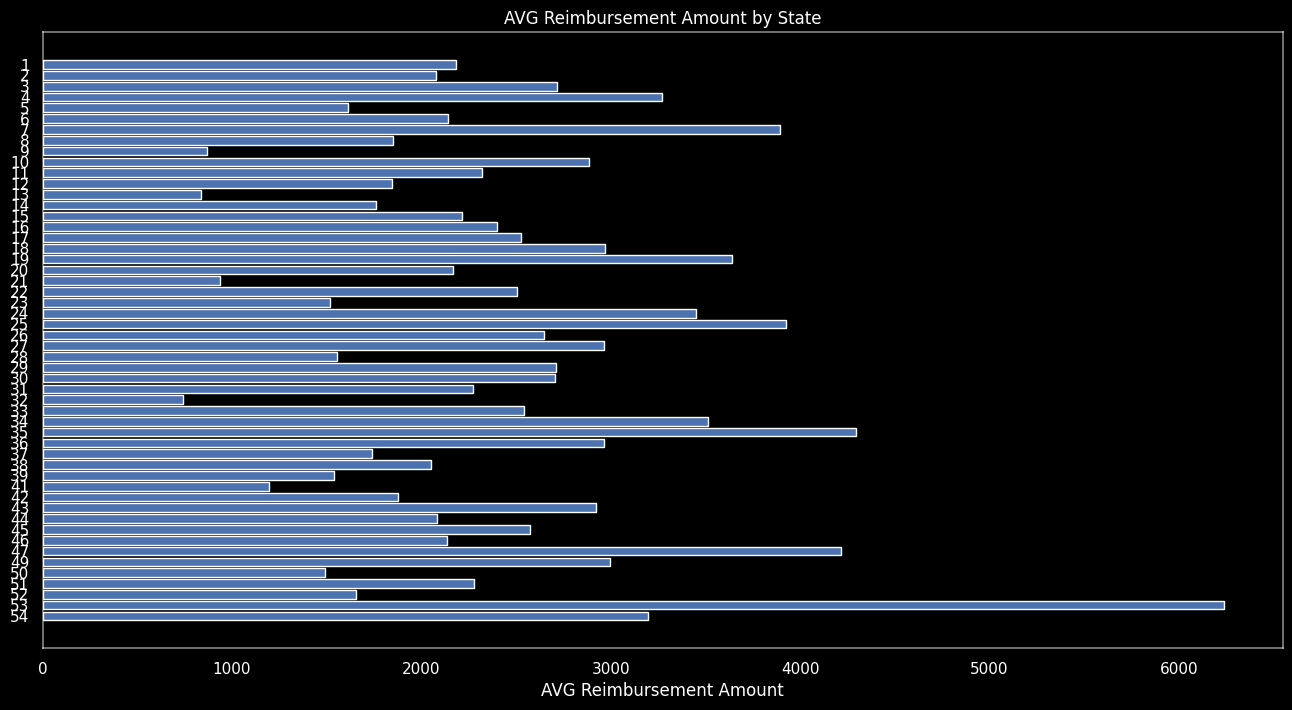

In [ ]:
#@title AVG Reimbursement Amount by State
# Query to get total reimbursement amount by state
query = """
MATCH (c:Claim)<-[:HAS_CLAIM]-(p:Patient)
WITH p.State as state, AVG(c.InscClaimAmtReimbursed) as average_reimbursement
RETURN state, average_reimbursement
ORDER BY state
"""
result = run_query(query)
states = [record['state'] for record in result]
avg_reimbersement = [record['average_reimbursement'] for record in result]

# print(result)

# Create horizontal bar chart of average reimbursement amount by state
fig, ax = plt.subplots(figsize=(16, 8))
y_pos = np.arange(len(states))
ax.barh(y_pos, avg_reimbersement, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(states)
ax.invert_yaxis()  # labels read top-to-bottom

# Set the x label and title to white
ax.set_xlabel('AVG Reimbursement Amount', color='white')
ax.set_title('AVG Reimbursement Amount by State', color='white')

# Change the color of the x and y axis tick labels to white
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Remove gridlines
ax.grid(False)

# Set the plot spines to white with 50% transparency
for spine in ax.spines.values():
    spine.set_edgecolor('white')
    spine.set_alpha(0.5)

plt.show()

In [ ]:
import pandas as pd

<ipython-input-19-e338e39bc734>:9: DeprecationWarning: read_transaction has been renamed to execute_read
  results = session.read_transaction(get_claim_duration_and_fraud_status)


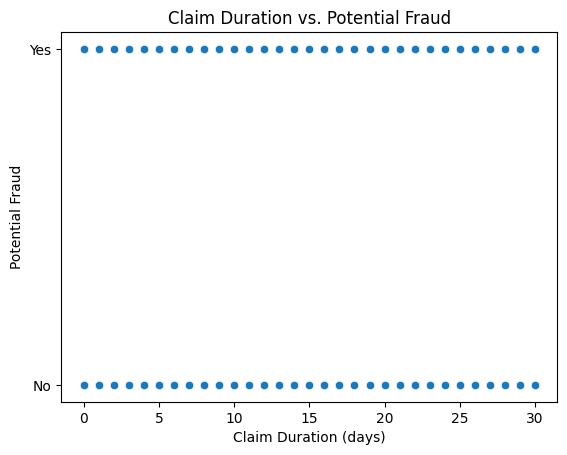

In [ ]:
def get_claim_duration_and_fraud_status(tx):
    result = tx.run("""
    MATCH (c:Claim)
    RETURN c.id as ClaimID, duration.between(datetime(c.StartDate), datetime(c.EndDate)).days as ClaimDuration, c.PotentialFraud as PotentialFraud
    """)
    return [record.data() for record in result]

with driver.session() as session:
    results = session.read_transaction(get_claim_duration_and_fraud_status)

# Convert the results to a DataFrame
df = pd.DataFrame(results)

# Create a scatterplot with Seaborn
sns.scatterplot(data=df, x='Potential', y='ClaimDuration')
plt.xlabel('Claim Duration (days)')
plt.ylabel('Potential Fraud')
plt.title('Claim Duration vs. Potential Fraud')
plt.show()

In [ ]:
def run_query(query):
    with driver.session() as session:
        result = session.run(query)
        return [record.data() for record in result]

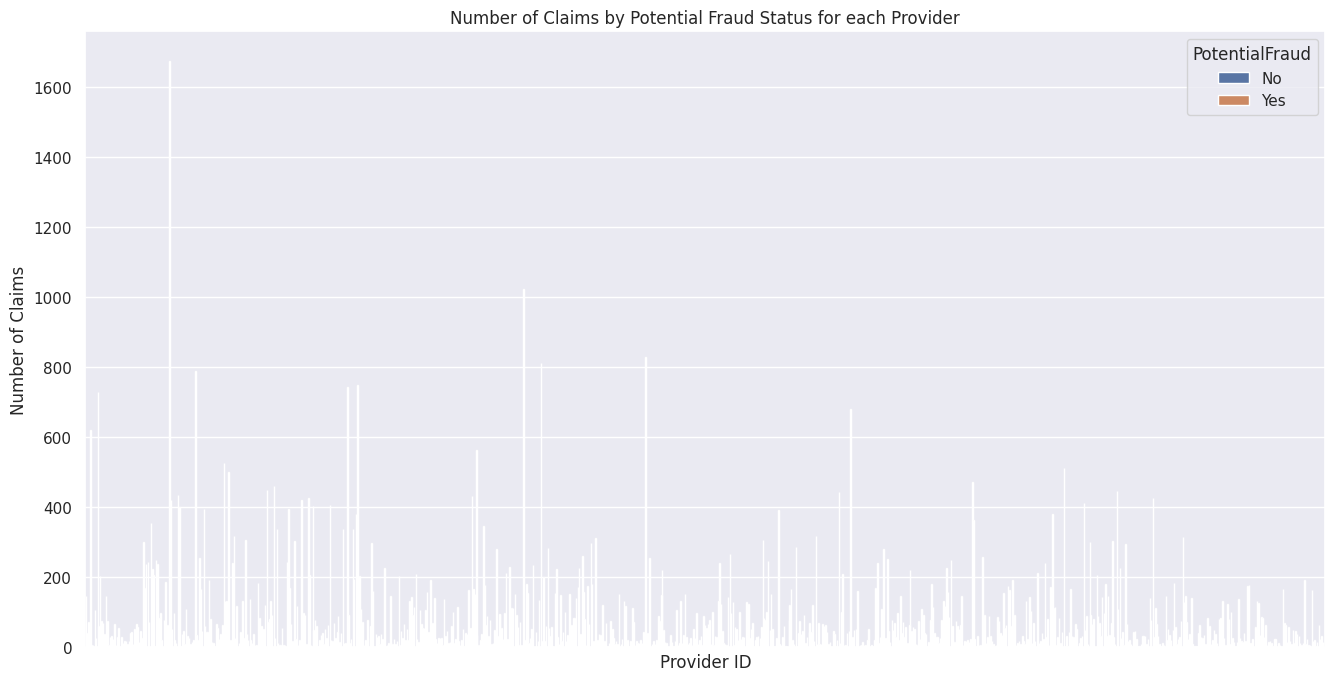

In [ ]:
#@title Number of Claims by Potential Fraud Status for each Provider
# Query to get total reimbursement amount by state
query = """
MATCH (p:Provider)-[:PROVIDES]->(c:Claim)
RETURN p.id as ProviderID, c.PotentialFraud as PotentialFraud, count(c) as NumberOfClaims

"""
result = run_query(query)
# Convert the results to a DataFrame
df = pd.DataFrame(result)
df.head()

# Create a bar plot with Seaborn
plt.figure(figsize=(16, 8))
sns.barplot(x='ProviderID', y='NumberOfClaims', hue='PotentialFraud', data=df)
plt.xticks([])
plt.xlabel('Provider ID')
plt.ylabel('Number of Claims')
plt.title('Number of Claims by Potential Fraud Status for each Provider')
plt.show()

In [ ]:
# Query to get Short Duration claims count by provider
query = """
MATCH (p:Provider)-[:PROVIDES]->(c:Claim)
WHERE duration.between(datetime(c.StartDate), datetime(c.EndDate)).days < 3
RETURN p.id as ProviderID, c.PotentialFraud as PotentialFraud, count(c) as NumberOfShortDurationClaims
"""
result = run_query(query)
# Convert the results to a DataFrame
df = pd.DataFrame(result)
df.head()

# Set the style and background color to black
sns.set_style("dark", {"axes.facecolor": "black", "figure.facecolor": "black"})
sns.set_palette(sns.cm.crest)

# Create a bar plot with Seaborn
plt.figure(figsize=(16, 8))
sns.barplot(x='NumberOfShortDurationClaims', y='ProviderID', hue='PotentialFraud', data=df, edgecolor = None)

# Remove the y-axis ticks
plt.yticks([])

# Set the x and y labels and title to white
plt.xlabel('number of claims', color='white')
plt.ylabel('Provider ID', color='white')
plt.title('Number of Claims by Potential Fraud Status for each Provider', color='white')

# Change the color of the x and y axis tick labels to white
ax = plt.gca()
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Remove gridlines
ax.grid(False)

# Set the plot spines to white with 50% transparency
for spine in ax.spines.values():
    spine.set_edgecolor('white')
    spine.set_alpha(0.5)

# Set the legend title and color to white
legend = plt.legend(title='Potential Fraud')
plt.setp(legend.get_texts(), color='white')
plt.setp(legend.get_title(), color='white')

plt.show()

TypeError: ignored

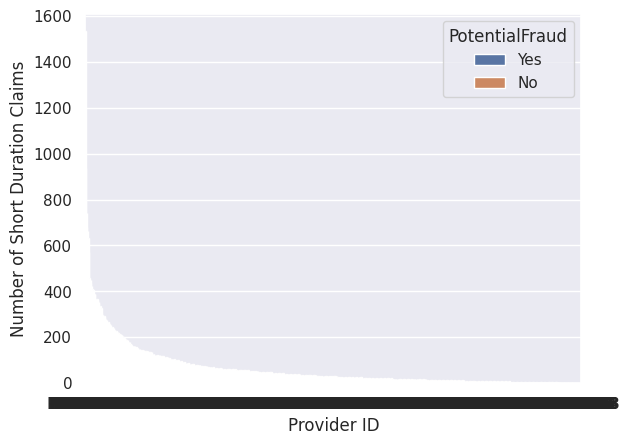

In [ ]:
#@title Number of Claims by Potential Fraud Status for each Provider
# Sort the DataFrame by NumberOfShortDurationClaims in descending order
df_sorted = df.sort_values('NumberOfShortDurationClaims', ascending=False)

sns.set_theme()

# Create the bar plot
sns.barplot(x="ProviderID", y="NumberOfShortDurationClaims", hue="PotentialFraud", data=df_sorted)

# Set the x and y labels to white
plt.xlabel('Provider ID')
plt.ylabel('Number of Short Duration Claims')

plt.show()

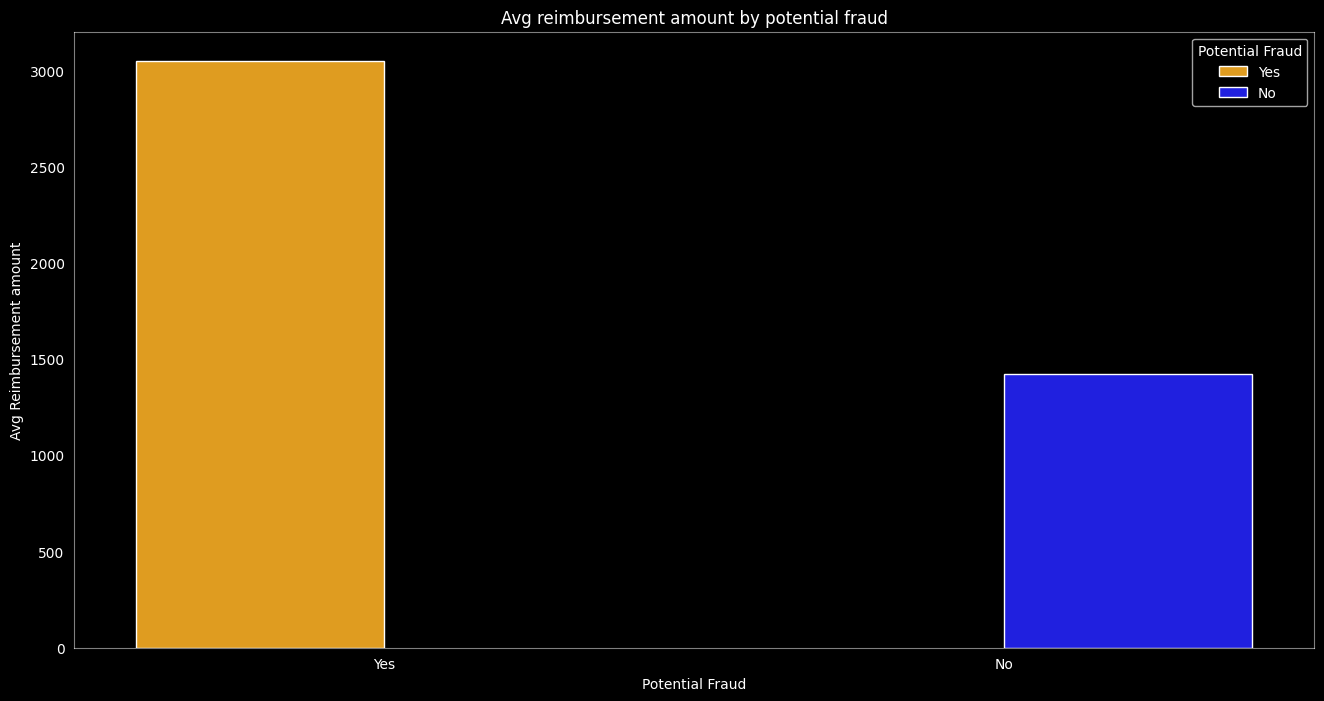

In [ ]:
#@title Avg reimbursement amount by potential fraud
# Query to get total reimbursement amount by state
query = """
MATCH (c:Claim)
RETURN c.PotentialFraud AS PotentialFraud, AVG(c.InscClaimAmtReimbursed) AS AvgReimbursement

"""
result = run_query(query)
# Convert the results to a DataFrame
df = pd.DataFrame(result)
df.head()

# Set the style and background color to black
sns.set_style("dark", {"axes.facecolor": "black", "figure.facecolor": "black"})

# Create a bar plot with Seaborn
plt.figure(figsize=(16, 8))
sns.barplot(x='PotentialFraud', y='AvgReimbursement', hue='PotentialFraud', data=df, palette=['orange', 'blue'], edgecolor=None)


# Set the x and y labels and title to white
plt.xlabel('Potential Fraud', color='white')
plt.ylabel('Avg Reimbursement amount', color='white')
plt.title('Avg reimbursement amount by potential fraud', color='white')

# Change the color of the x and y axis tick labels to white
ax = plt.gca()
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Remove gridlines
ax.grid(False)

# Set the plot spines to white with 50% transparency
for spine in ax.spines.values():
    spine.set_edgecolor('white')
    spine.set_alpha(0.5)

# Set the legend title and color to white
legend = plt.legend(title='Potential Fraud')
plt.setp(legend.get_texts(), color='white')
plt.setp(legend.get_title(), color='white')

plt.show()

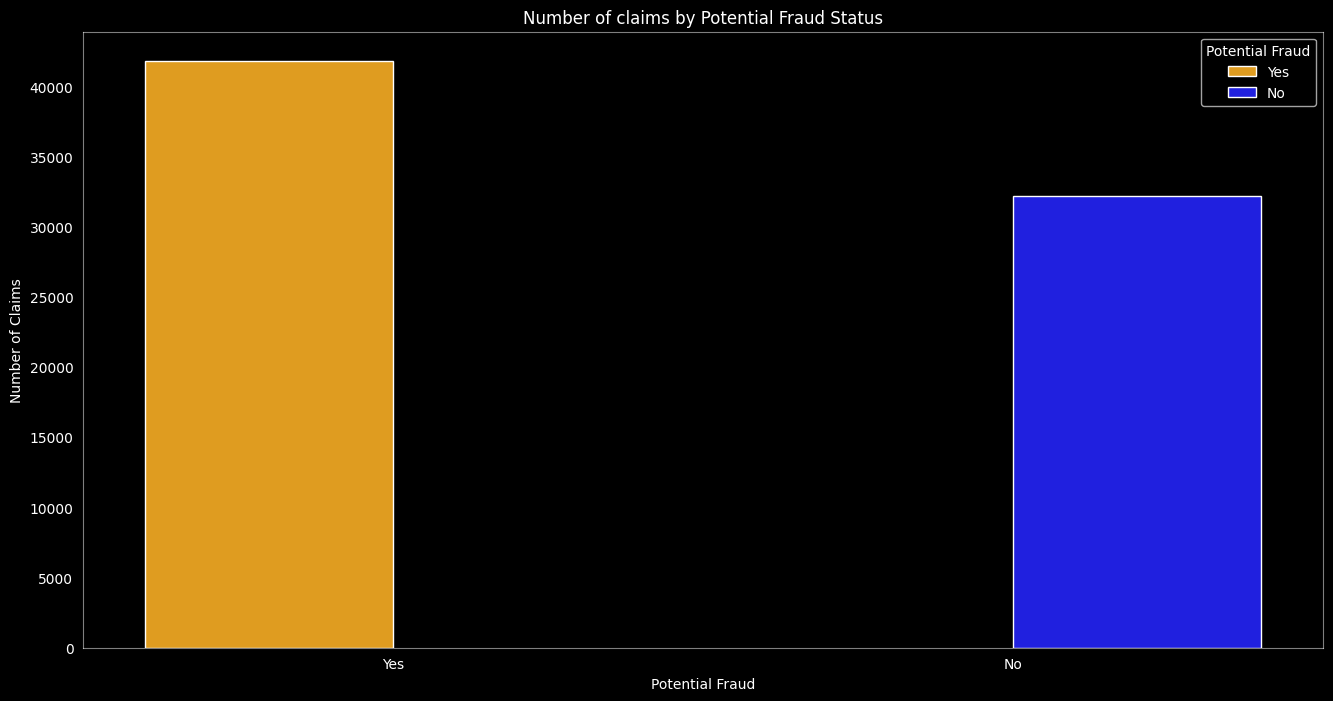

In [ ]:
#@title Number of claims by Potential Fraud Status
# Query to get total reimbursement amount by state
query = """
MATCH (c:Claim)
RETURN c.PotentialFraud AS potential_fraud, COUNT(c) AS num_claims
"""
result = run_query(query)
# Convert the results to a DataFrame
df = pd.DataFrame(result)
df.head()

# Set the style and background color to black
sns.set_style("dark", {"axes.facecolor": "black", "figure.facecolor": "black"})

# Create a bar plot with Seaborn
plt.figure(figsize=(16, 8))
sns.barplot(x='potential_fraud', y='num_claims', hue='potential_fraud', data=df, palette=['orange', 'blue'], edgecolor=None)


# Set the x and y labels and title to white
plt.xlabel('Potential Fraud', color='white')
plt.ylabel('Number of Claims', color='white')
plt.title('Number of claims by Potential Fraud Status', color='white')

# Change the color of the x and y axis tick labels to white
ax = plt.gca()
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Remove gridlines
ax.grid(False)

# Set the plot spines to white with 50% transparency
for spine in ax.spines.values():
    spine.set_edgecolor('white')
    spine.set_alpha(0.5)

# Set the legend title and color to white
legend = plt.legend(title='Potential Fraud')
plt.setp(legend.get_texts(), color='white')
plt.setp(legend.get_title(), color='white')

plt.show()